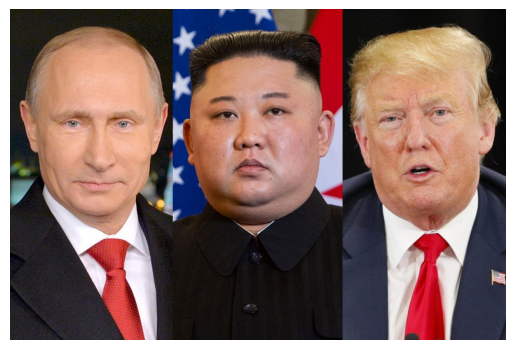

There are 3 people in this image


In [18]:
!pip install dlib
!pip install face_recognition
!pip install face_recognition --no-deps
import face_recognition
import matplotlib.pyplot as plt

image = face_recognition.load_image_file("leader.jpg")

face_locations = face_recognition.face_locations(image)

plt.imshow(image)
plt.axis("off")
plt.show()

print(f"There are {len(face_locations)} people in this image")

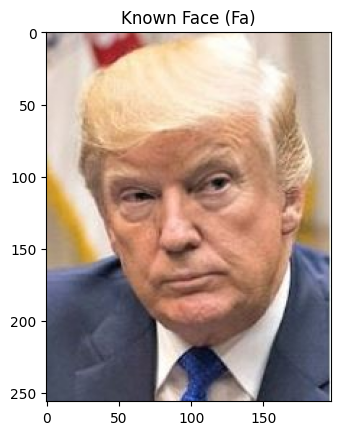

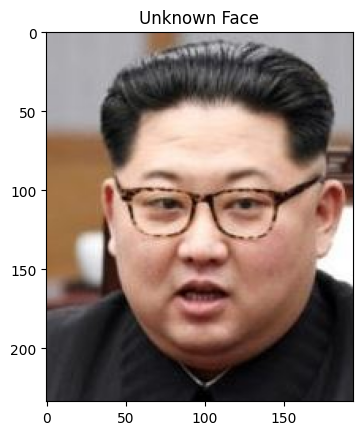

This is NOT Fa


In [3]:
import face_recognition
import matplotlib.pyplot as plt

image_of_person = face_recognition.load_image_file('./known_faces/Trump1.jpg')
person_face_encoding = face_recognition.face_encodings(image_of_person)[0]
plt.imshow(image_of_person)
plt.title("Known Face (Fa)")
plt.show()

unknown_image = face_recognition.load_image_file('./unknown_faces/Kim.JPG')
unknown_face_encoding = face_recognition.face_encodings(unknown_image)[0]
plt.imshow(unknown_image)
plt.title("Unknown Face")
plt.show()

results = face_recognition.compare_faces([person_face_encoding], unknown_face_encoding)

if results[0]:
    print("This is Fa")
else:
    print("This is NOT Fa")

In [11]:
from PIL import Image
import face_recognition
import matplotlib.pyplot as plt

image = face_recognition.load_image_file('./identification/people3.jpg')
face_locations = face_recognition.face_locations(image)

num = 1

for face_location in face_locations:
    top, right, bottom, left = face_location
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    pil_image.show()
    filename = f"face{num}.jpg"
    pil_image.save(f'./identification/{filename}')
    num += 1

In [27]:
!pip install --upgrade pillow
import face_recognition
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# 載入已知的臉部圖像並編碼
image_of_Fa = face_recognition.load_image_file('./identification/face1.jpg')
Fa_face_encoding = face_recognition.face_encodings(image_of_Fa)[0]

image_of_Winston = face_recognition.load_image_file('./identification/face3.jpg')
Winston_face_encoding = face_recognition.face_encodings(image_of_Winston)[0]

known_face_encodings = [Fa_face_encoding, Winston_face_encoding]
known_face_names = ["Fa", "Winston"]

# 載入測試圖像
test_image = face_recognition.load_image_file('./identification/people3.jpg')
face_locations = face_recognition.face_locations(test_image)
face_encodings = face_recognition.face_encodings(test_image, face_locations)

# 轉換為 PIL 圖像進行繪圖
pil_image = Image.fromarray(test_image)
draw = ImageDraw.Draw(pil_image)

# 載入字型（如果找不到 arial.ttf，可省略 font 參數）
try:
    font = ImageFont.truetype("arial.ttf", 20)
except:
    font = None  # 使用預設字型

# 在測試圖像上標記臉部
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    name = "Unknown Person"

    # 如果有匹配的臉部
    if True in matches:
        first_match_index = matches.index(True)
        name = known_face_names[first_match_index]

    # 繪製矩形
    draw.rectangle([(left, top), (right, bottom)], outline=(0, 0, 0), width=2)

    # 計算文字大小並繪製背景和文字
    bbox = draw.textbbox((0, 0), name, font=font) if font else (0, 0, 50, 20)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]

    draw.rectangle([(left, bottom - text_height - 8), (right, bottom)], fill=(0, 0, 255), outline=(0, 0, 0))
    draw.text((left + 6, bottom - text_height - 8), name, fill=(255, 255, 255), font=font)

# 釋放繪圖工具
del draw

# 顯示和保存結果圖像
pil_image.show()
pil_image.save('identify.jpg')
